In [1]:
import numpy as np
import pandas as pd

from data_generation import generate_gaussian_noises_dict, generate_sparse_response, generate_perturbed_response

Generate data

In [2]:
# Use the functions to generate a Gaussian noise matrix and a sparse response
np.random.seed(0)
N = 100000
d = 300
m = 50
dictionary = generate_gaussian_noises_dict(N, d)
y, indices, coefficients = generate_sparse_response(dictionary, m)
noise_scale = 0.05
y_perturbed = generate_perturbed_response(y, noise_scale)

In [3]:
print('Real indices:', indices)
print('Real coefficients:', np.ravel(coefficients))

Real indices: [ 3582 60498 53227 21333  3885 51521 84261 10685 59948 41032 25747 44303
 83813 61991 49392 37116 65942  2216 81749 77996 30999 18294 81976 29876
 85471  8959 70029 28324 50521 89741  8350  4655 90049 66296 35416 50253
 46535 65667 56112 69884 69132 27954 45096 83141  7413 52692 27712 47173
 47393 87379]
Real coefficients: [ 1.87413779  0.630206   -0.24697655  0.85295699 -0.31762557 -0.95475304
 -0.33562075  1.55011843 -1.57176782 -1.3407682  -0.73598724  0.06443201
 -0.22466594 -0.26333802  0.834951    0.43156547  0.53180328  0.37411334
 -0.76095903  0.64069025 -0.60034938 -1.00010719  0.11934717  1.51143162
  1.04853558  0.53667196 -0.68620319 -0.40708522  0.69691247 -0.74340084
 -0.22861014 -1.77736584  0.72670967 -0.47673518  0.28419177 -0.77828999
 -1.234416   -0.21578628  0.55678469 -2.31688978  2.11890155  1.96910129
 -0.1081604   0.61521219 -0.92771841 -1.32325071 -1.64584385 -1.62347542
  0.28682219 -0.14946294]


In [4]:
from algorithms import matching_pursuit, orthogonal_matching_pursuit

MP_a_perturb, MP_indices_perturb, MP_coefficients_perturb = matching_pursuit(y_perturbed, dictionary, m)

print('The indices for each step:', MP_indices_perturb)
print('The coefficients for each step:', MP_coefficients_perturb)

print("MSE:", np.mean((MP_a_perturb - y)**2))

The indices for each step: [69132, 80031, 95347, 68213, 33112, 69884, 10685, 70029, 74565, 47785, 56387, 32269, 91226, 94046, 4980, 48265, 42156, 7209, 83210, 50522, 72110, 4435, 49405, 77944, 99876, 38349, 92691, 43321, 83883, 21006, 56273, 91012, 27700, 10065, 51820, 34164, 70150, 61665, 69115, 79275, 65555, 12481, 66029, 78797, 72762, 44065, 14090, 2958, 84774, 82594]
The coefficients for each step: [array([[2.63874444]]), array([[-2.43079648]]), array([[2.26258588]]), array([[-2.15155748]]), array([[2.08114992]]), array([[-1.93175557]]), array([[1.90173971]]), array([[-1.9784231]]), array([[-1.67671565]]), array([[1.65626439]]), array([[-1.64960878]]), array([[1.54453198]]), array([[1.53900022]]), array([[1.4641995]]), array([[1.38806927]]), array([[1.36787208]]), array([[-1.37495358]]), array([[-1.28974978]]), array([[1.26282641]]), array([[1.20974903]]), array([[1.18478319]]), array([[1.1861292]]), array([[1.10325328]]), array([[-1.06772567]]), array([[1.10962166]]), array([[-1.0

In [7]:
from bagging_pursuit_functions import *

N_lst= [5, 10, 20, 50, 100]
mse_test_lst = []

for N in N_lst:
    final_c, final_a, _, _, _, _ = bagging_marching_pursuit(y_perturbed, dictionary, m*2, N, signal_bagging_percent = 0.8, atom_bag_percent=0.8, select_atom_percent=0)
    tmp_mse = np.mean((final_a - y)**2)
    mse_test_lst.append(tmp_mse)

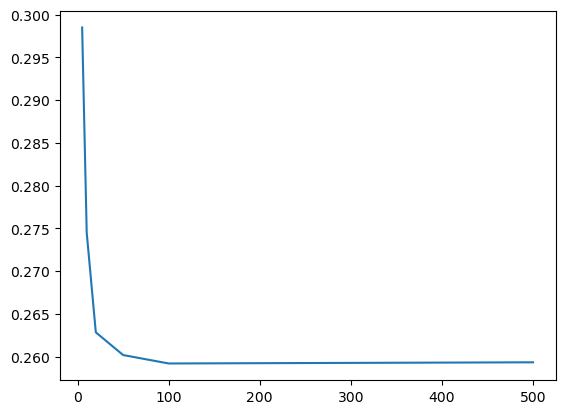

In [8]:
from matplotlib import pyplot as plt

plt.plot(N_lst, mse_test_lst)